In [ ]:
# ....... look into filtered merged Cui et al data ....... #

In [2]:
library(SingleCellExperiment)
library(Matrix)
library(MetaNeighbor)
library(MetaMarkers)
library(scater)
library(dplyr)

In [10]:
cuimat = read.delim('~/heart/GSE106118_UMI_count_merge.txt', sep = '\t')
cuicls = read.delim('~/heart/cui_cluster_anno.csv', sep = ',')
# cuibarcodes = read.delim('~/heart/GSE106118_barcode_information.txt', sep = '\t')

In [160]:
# scRNA-seq - wow!
mean(colSums(cuimat, na.rm = T))
median(colSums(cuimat, na.rm = T))
dim(cuimat)

[1] 94023.81

[1] 66476.5

[1] 24153  4948

In [ ]:
ginfo = read.delim('/data/CoCoCoNet/geneInfo/human_info.csv', sep = ',')
cinfo = read.delim('/data/CoCoCoNet/geneInfo/chicken_info.csv', sep = ',')

In [124]:
om = read.delim('/data/CoCoCoNet/orthologMaps/chicken_human_orthoNM.csv', sep = ',')
om[1:3,]

chicken            human           chicken_OrthoID human_OrthoID
1 ENSGALG00000037838 ENSG00000198695 9031_0:004a8b   9606_0:000000
2 ENSGALG00000030436 ENSG00000198840 9031_0:004a85   9606_0:000001
3 ENSGALG00000043768 ENSG00000198763 9031_0:004a80   9606_0:000002

In [98]:
genes = unlist(cuimat[,1])
cuimat <- as.matrix(cuimat[,-1])
rownames(cuimat) = genes

cuimat[1:2,1:3]

HE5W_1_LA.1 HE5W_1_LA.2 HE5W_1_LA.3
A1BG     0           0           0          
A1BG-AS1 0           0           0

In [161]:
# subset to 3842 cells with anno
mat2 = cuimat[,which(!is.na(match(colnames(cuimat), cuicls$Cell.Name)))]

# SCE object
mat2 = SingleCellExperiment(mat2)
colData(mat2)$Cluster = cuicls$Cluster[match(colnames(mat2), cuicls$Cell.Name)]
colData(mat2)$Dataset = 'Cui'
rownames(colData(mat2)) = colnames(mat2)

rownames(mat2) <- ginfo$EnsemblID[match(rownames(mat2), ginfo$GeneSymbol)]
mat2 <- mat2[!is.na(rownames(mat2)),]
rowData(mat2)$Gene = rownames(mat2)
rowData(mat2)$Symbol = ginfo$GeneSymbol[match(rownames(mat2), ginfo$EnsemblID)]

assay(mat2, "cpm") = convert_to_cpm(assay(mat2))
assayNames(mat2) <- c('counts', 'cpm')

In [13]:
# 3842 of 4948 cells have cluster anno
table(cuicls$Cluster)


                  C1 (5W)                   C2 (CM) C3 (Fibroblast-like cell) 
                      257                      1492                       786 
                  C4 (EC)          C5 (Valvar cell)                   C6 (EP) 
                      445                       427                        46 
           C7 (Mast cell)           C8 (Macrophage)            C9 (B/T cells) 
                       27                       304                        58 

In [100]:
mat2

class: SingleCellExperiment 
dim: 20855 3842 
metadata(0):
assays(2): counts cpm
rownames(20855): ENSG00000121410 ENSG00000268895 ... ENSG00000074755
  ENSG00000036549
rowData names(2): Gene Symbol
colnames(3842): HE5W_1_LA.1 HE5W_1_LA.3 ... HE23W_2_RV.22 HE23W_2_RV.24
colData names(2): Cluster Dataset
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):

In [101]:
start.time <- Sys.time()
hvg = variableGenes(mat2, exp_labels = mat2$Cluster)
# defaults to top 95% of genes. May need to vary
end.time <- Sys.time()
time.taken <- end.time - start.time
time.taken

length(hvg)

Time difference of 2.472189 secs

[1] 304

In [ ]:
# load chicken devp data
library(rhdf5)
barcodes = read.delim('~/heart/chicken/chicken_scRNAseq_metadata.csv', sep = ',')

In [162]:
# load timepoint by timepoint
# file1 = '~/heart/chicken/GSM4502475_chicken_heart_scRNAseq_D4_filtered_feature_bc_matrix.h5'
# h5ls(file1)
# currcodes = h5read(file1, 'matrix/barcodes')

file1 = '~/heart/chicken/GSM4502480_chicken_heart_scRNAseq_D14_LV_filtered_feature_bc_matrix.h5'
h5ls(file1)
currcodes11 = h5read(file1, 'matrix/barcodes')

file2 = '~/heart/chicken/GSM4502481_chicken_heart_scRNAseq_D14_RV_filtered_feature_bc_matrix.h5'
h5ls(file2)
currcodes22 = h5read(file2, 'matrix/barcodes')

group            name          otype       dclass  dim   
0  /                matrix        H5I_GROUP                 
1  /matrix          barcodes      H5I_DATASET STRING  1988  
2  /matrix          data          H5I_DATASET INTEGER 668962
3  /matrix          features      H5I_GROUP                 
4  /matrix/features _all_tag_keys H5I_DATASET STRING  1     
5  /matrix/features feature_type  H5I_DATASET STRING  24356 
6  /matrix/features genome        H5I_DATASET STRING  24356 
7  /matrix/features id            H5I_DATASET STRING  24356 
8  /matrix/features name          H5I_DATASET STRING  24356 
9  /matrix          indices       H5I_DATASET INTEGER 668962
10 /matrix          indptr        H5I_DATASET INTEGER 1989  
11 /matrix          shape         H5I_DATASET INTEGER 2

group            name          otype       dclass  dim   
0  /                matrix        H5I_GROUP                 
1  /matrix          barcodes      H5I_DATASET STRING  2342  
2  /matrix          data          H5I_DATASET INTEGER 764270
3  /matrix          features      H5I_GROUP                 
4  /matrix/features _all_tag_keys H5I_DATASET STRING  1     
5  /matrix/features feature_type  H5I_DATASET STRING  24356 
6  /matrix/features genome        H5I_DATASET STRING  24356 
7  /matrix/features id            H5I_DATASET STRING  24356 
8  /matrix/features name          H5I_DATASET STRING  24356 
9  /matrix          indices       H5I_DATASET INTEGER 764270
10 /matrix          indptr        H5I_DATASET INTEGER 2343  
11 /matrix          shape         H5I_DATASET INTEGER 2

In [166]:
head(currcodes11)
head(currcodes22)
head(barcodes$X)
table(barcodes$day)

[1] "AAACCTGAGCGATGAC-1" "AAACCTGCATTGTGCA-1" "AAACGGGAGAAGGTTT-1"
[4] "AAACGGGAGGCCATAG-1" "AAACGGGAGTTACCCA-1" "AAACGGGCACGGCCAT-1"

[1] "AAACCTGAGACTACAA-1" "AAACCTGCAAAGAATC-1" "AAACGGGAGCCACCTG-1"
[4] "AAACGGGCACGTGAGA-1" "AAACGGGTCAAACGGG-1" "AAACGGGTCAATCTCT-1"

[1] "D4_AAACCCAAGCTAAACA" "D4_AAACCCACAAATCAAG" "D4_AAACCCACACTTACAG"
[4] "D4_AAACCCACATCTTTCA" "D4_AAACCCACATGAATAG" "D4_AAACCCAGTAGCGCCT"


 D10  D14   D4   D7 
5190 3009 5653 8463 

In [171]:
# update current barcodes to match full barcode list
currcodes = data.frame(cell = paste0('D14-LV_', sub('-.*', '', currcodes11)), id = currcodes11)
currcodes = rbind(currcodes, data.frame(cell = paste0('D14-RV_', sub('-.*', '', currcodes22)), id = currcodes22))

In [172]:
# full barcode details
bcodes2 = barcodes[match(currcodes$cell, barcodes$X),]
bcodes2 <- bcodes2[!is.na(bcodes2$X),]

head(bcodes2)
dim(bcodes2)

X                       orig.ident nCount_RNA nFeature_RNA percent.mito
19307 D14-LV_AAACCTGCATTGTGCA D14-LV     1163       536          14.2734308  
19308 D14-LV_AAACGGGAGAAGGTTT D14-LV      575       338           0.8695652  
19309 D14-LV_AAACGGGAGGCCATAG D14-LV      574       334          14.8083624  
19310 D14-LV_AAACGGGAGTTACCCA D14-LV      550       296           7.8181818  
19311 D14-LV_AAACGGGCACGGCCAT D14-LV      584       331          10.9589041  
19312 D14-LV_AAACGGGGTAAGGATT D14-LV     1126       525           7.8152753  
      S.Score     G2M.Score   Phase RNA_snn_res.0.5 seurat_clusters
19307 -0.38340649 -0.50091692 G1    0               11             
19308  0.09972851 -0.01187294 S     0                6             
19309 -0.02166959 -0.38878835 G1    0                0             
19310 -0.25620552 -0.09779856 G1    0                0             
19311  0.16357724 -0.06564577 S     6                6             
19312 -0.03986456 -0.36229797 G1    7                0             
      scanorama_snn_res.0.5 scanorama_snn_res.0.4 scanorama_snn_res.0.3
19307 11                    1                     0                    
19308  6                    5                     9                    
19309  0                    1                     0                    
19310  0                    1                     0                    
19311  6                    5                     9                    
19312  0                    1                     0                    
      scanorama_snn_res.0.25 scanorama_snn_res.0.2 day ventricle
19307 1                      1                     D14 LV       
19308 5                      2                     D14 LV       
19309 1                      1                     D14 LV       
19310 1                      1                     D14 LV       
19311 5                      2                     D14 LV       
19312 1                      1                     D14 LV       
      celltypes.0.5    
19307 Mural cells      
19308 TMSB4X high cells
19309 Fibroblast cells 
19310 Fibroblast cells 
19311 TMSB4X high cells
19312 Fibroblast cells

[1] 3009   18

In [174]:
aa = h5read(file1, 'matrix')
bb = h5read(file2, 'matrix')
mtd2 = data.frame(gene = h5read(file1, 'matrix/features/id'), genename = h5read(file1, 'matrix/features/name'))

In [175]:
dim(aa)
dim(mtd2)

NULL

[1] 24356     2

In [179]:
matids = which(!is.na(match(currcodes$cell, barcodes$X)))
length(matids)

[1] 3009

In [72]:
str(aa)

List of 6
 $ barcodes: chr [1:7755(1d)] "AAACCCAAGCTAAACA-1" "AAACCCACAAATCAAG-1" "AAACCCACAACGGGTA-1" "AAACCCACACCACTGG-1" ...
 $ data    : int [1:9542685(1d)] 1 2 1 1 1 2 1 3 3 1 ...
 $ features:List of 5
  ..$ _all_tag_keys: chr [1(1d)] "genome"
  ..$ feature_type : chr [1:24356(1d)] "Gene Expression" "Gene Expression" "Gene Expression" "Gene Expression" ...
  ..$ genome       : chr [1:24356(1d)] "chicken_reference_cellranger_6.0" "chicken_reference_cellranger_6.0" "chicken_reference_cellranger_6.0" "chicken_reference_cellranger_6.0" ...
  ..$ id           : chr [1:24356(1d)] "ENSGALG00000054818" "ENSGALG00000053455" "ENSGALG00000045540" "ENSGALG00000051297" ...
  ..$ name         : chr [1:24356(1d)] "ENSGALG00000054818" "ENSGALG00000053455" "ENSGALG00000045540" "ENSGALG00000051297" ...
 $ indices : int [1:9542685(1d)] 24210 24199 23908 23904 23897 23895 23894 23891 23888 23882 ...
 $ indptr  : int [1:7756(1d)] 0 576 899 1080 1993 3281 4867 5207 5593 6229 ...
 $ shape   : int [1:2(1

In [176]:
library(Matrix)
counts1 <- sparseMatrix(dims = aa$shape, i = as.numeric(aa$indices), p = as.numeric(aa$indptr),
    x = as.numeric(aa$data), index1 = FALSE)
counts2 <- sparseMatrix(dims = bb$shape, i = as.numeric(bb$indices), p = as.numeric(bb$indptr),
    x = as.numeric(bb$data), index1 = FALSE)
counts = cbind(counts1, counts2)

In [181]:
chickmat = SingleCellExperiment(counts, rowData = aa$features, colData = currcodes)
chickmat <- chickmat[,matids]

In [182]:
chickmat

class: SingleCellExperiment 
dim: 24356 3009 
metadata(0):
assays(1): ''
rownames: NULL
rowData names(5): _all_tag_keys feature_type genome id name
colnames: NULL
colData names(2): cell id
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):

In [189]:
# SCE object
mat3 = chickmat
colData(mat3)$Cluster = bcodes2$celltypes.0.5
colData(mat3)$Dataset = 'Chicken'
colData(mat3) <- colData(mat3)[,-c(1:2)]

colnames(mat3) = bcodes2$X
rownames(colData(mat3)) = colnames(mat3)

In [190]:
assay(mat3, "cpm") = convert_to_cpm(assay(mat3))
assayNames(mat3) <- c('counts', 'cpm')

In [191]:
mat3

class: SingleCellExperiment 
dim: 24356 3009 
metadata(0):
assays(2): counts cpm
rownames: NULL
rowData names(5): _all_tag_keys feature_type genome id name
colnames(3009): D14-LV_AAACCTGCATTGTGCA D14-LV_AAACGGGAGAAGGTTT ...
  D14-RV_TTTGTCAAGTAACCCT D14-RV_TTTGTCACAATGGAGC
colData names(2): Cluster Dataset
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):

In [192]:
# subset to orthologs with human
rownames(mat3) <- om$human[match(rowData(mat3)$id, om$chicken)]
mat3 <- mat3[!is.na(rownames(mat3)),]

In [193]:
# subset to common genes
cgenes = intersect(rownames(mat2), rownames(mat3))
mat2 <- mat2[cgenes,]
mat3 <- mat3[cgenes,]

In [194]:
rowData(mat3) <- rowData(mat2)

In [195]:
mat3

class: SingleCellExperiment 
dim: 9510 3009 
metadata(0):
assays(2): counts cpm
rownames(9510): ENSG00000121410 ENSG00000148584 ... ENSG00000159840
  ENSG00000036549
rowData names(2): Gene Symbol
colnames(3009): D14-LV_AAACCTGCATTGTGCA D14-LV_AAACGGGAGAAGGTTT ...
  D14-RV_TTTGTCAAGTAACCCT D14-RV_TTTGTCACAATGGAGC
colData names(2): Cluster Dataset
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):

In [196]:
# scRNA-seq - wow!
mean(colSums(counts(mat3), na.rm = T))
median(colSums(counts(mat3), na.rm = T))
dim(mat3)

[1] 577.106

[1] 428

[1] 9510 3009

In [197]:
start.time <- Sys.time()
hvg = variableGenes(mat2, exp_labels = mat2$Cluster)
# defaults to top 95% of genes. May need to vary
end.time <- Sys.time()
time.taken <- end.time - start.time
time.taken

length(hvg)

Time difference of 0.8425739 secs

[1] 89

In [198]:
source('gene_set_enrichment.R')
gse = gene_set_enrichment(hvg, 'human')
gse$description[gse$sig==TRUE][1:10]
head(gse)

[1] "mitotic cell cycle"                               
 [2] "mitotic cell cycle process"                       
 [3] "regulation of cell cycle process"                 
 [4] "regulation of mitotic cell cycle"                 
 [5] "regulation of mitotic cell cycle phase transition"
 [6] "cell division"                                    
 [7] "regulation of cell cycle phase transition"        
 [8] "DNA conformation change"                          
 [9] "regulation of cell cycle G2/M phase transition"   
[10] "cellular response to DNA damage stimulus"

GO_term    description                                      
GO:0000278 GO:0000278 mitotic cell cycle                               
GO:1903047 GO:1903047 mitotic cell cycle process                       
GO:0010564 GO:0010564 regulation of cell cycle process                 
GO:0007346 GO:0007346 regulation of mitotic cell cycle                 
GO:1901990 GO:1901990 regulation of mitotic cell cycle phase transition
GO:0051301 GO:0051301 cell division                                    
           N_sample N_univ pvals        adj_pvals    sig 
GO:0000278 31       766    4.037662e-24 3.629858e-20 TRUE
GO:1903047 29       681    4.008689e-23 1.801906e-19 TRUE
GO:0010564 23       899    1.505114e-13 3.741200e-10 TRUE
GO:0007346 22       809    1.664605e-13 3.741200e-10 TRUE
GO:1901990 18       509    4.714628e-13 8.476902e-10 TRUE
GO:0051301 18       528    8.731293e-13 1.308239e-09 TRUE

In [199]:
genes22 = hvg
data1 = mat2[genes22,]
data2 = mat3[genes22,]
# colData(data1) <- colData(data1)[c('Cluster', 'Dataset')]
# rowData(data1) <- rowData(data1)[c('Gene', 'Symbol')]

In [200]:
newmat = cbind(data1, data2)
dim(newmat)

[1]   89 6851

In [201]:
start.time <- Sys.time()

auroc1 = MetaNeighborUS(var_genes = genes22, dat = newmat, study_id = newmat$Dataset, 
    cell_type = newmat$Cluster, fast_version = TRUE, one_vs_best = TRUE,
    symmetric_output = FALSE)

auroc2 = MetaNeighborUS(var_genes = genes22, dat = newmat, study_id = newmat$Dataset, 
    cell_type = newmat$Cluster, fast_version = TRUE, one_vs_best = FALSE,
    symmetric_output = FALSE)


end.time <- Sys.time()
time.taken <- end.time - start.time
time.taken

Time difference of 0.1370258 secs

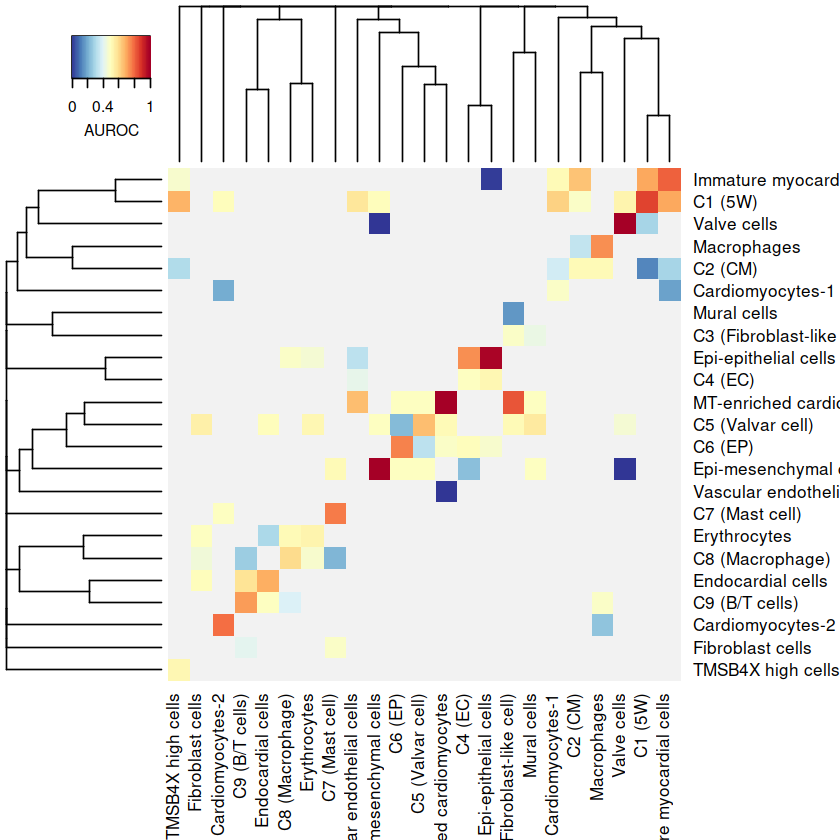

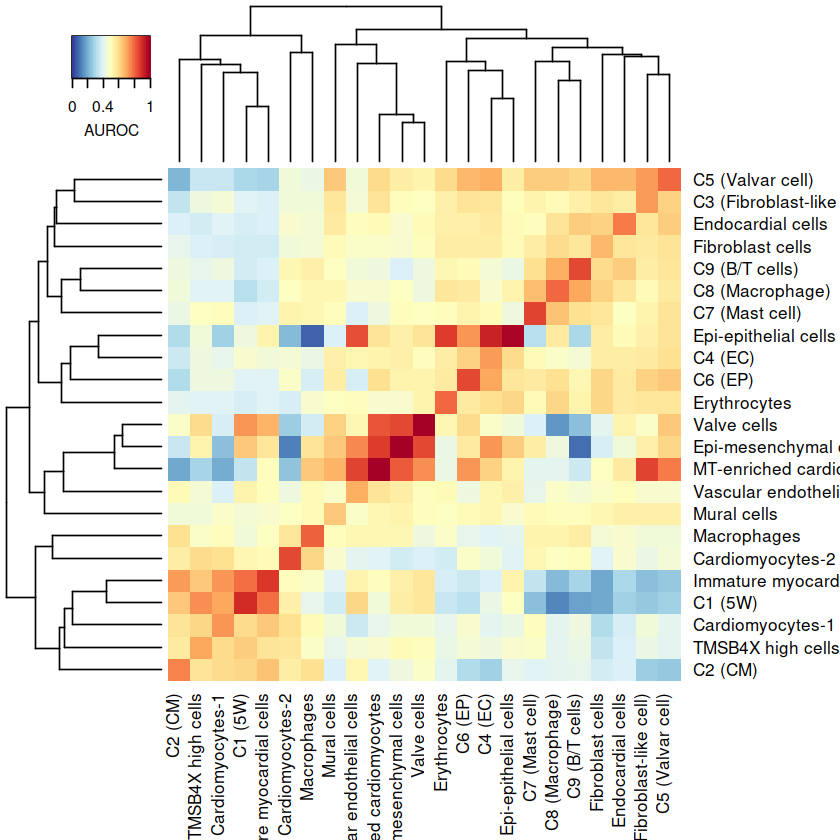

In [214]:
# png('chick_D14_1vsbest.png', width = 10, height = 10, res = 300, units = 'in')
currmat = auroc1
rownames(currmat) <- sub(".*\\|", "", rownames(auroc1))
colnames(currmat) = rownames(currmat)
MetaNeighbor::plotHeatmap(currmat, cex = 1)
# dev.off()

# png('chick_D14_allvsall.png', width = 10, height = 10, res = 300, units = 'in')
currmat = auroc2
rownames(currmat) <- sub(".*\\|", "", rownames(auroc1))
colnames(currmat) = rownames(currmat)
MetaNeighbor::plotHeatmap(currmat, cex = 1)
# dev.off()

In [ ]:
# also do cell type enrichment for marker gene sets in Amalia's data

In [204]:
markers = read.delim('~/heart/human_heart_dev_markers.csv', sep = ',')
markers[1:3,]

Gene   Celltype     
1 MYBPC3 Cardiomyocyte
2 RBM20  Cardiomyocyte
3 RYR2   Cardiomyocyte

In [205]:
# Cui et al 3.8k cells dataset
top_markers = data.frame(gene = ginfo$EnsemblID[match(markers[,1], ginfo$GeneSymbol)], cell_type = as.factor(markers[,2]), group = 'sim_SI')
ct_scores = score_cells(log1p(cpm(mat2)), top_markers)
ct_enrichment = compute_marker_enrichment(ct_scores)
ct_pred = assign_cells(ct_scores)
ct_pred$anno = mat2$Cluster

In [206]:
# verify in original Cui et al data
table(ct_pred$anno)
table(ct_pred$predicted[grep('C1', ct_pred$anno)])


                  C1 (5W)                   C2 (CM) C3 (Fibroblast-like cell) 
                      257                      1492                       786 
                  C4 (EC)          C5 (Valvar cell)                   C6 (EP) 
                      445                       427                        46 
           C7 (Mast cell)           C8 (Macrophage)            C9 (B/T cells) 
                       27                       304                        58 


Cardiomyocyte    Epicardial    Fibroblast    unassigned 
          236            13             5             3 

In [207]:
# ........ now on Amalia's dataset ......... #
ct_scores = score_cells(log1p(cpm(mat3)), top_markers)
ct_enrichment = compute_marker_enrichment(ct_scores)
ct_pred = assign_cells(ct_scores)
ct_pred$anno = mat3$Cluster

In [152]:
table(ct_pred$predicted)


Cardiomyocyte   Endothelial    Epicardial     Erythroid    Fibroblast 
           29           263           245          2081           216 
       Immune        Neuron           SMC    unassigned 
           47            26          1113          1633 

In [153]:
table(ct_pred$predicted[which(ct_pred$anno=='Cardiomyocyte')])

< table of extent 0 >

In [208]:
outmat = ct_pred %>% group_by(anno, predicted) %>% summarize(sumAmount = length(predicted))
head(outmat)

`summarise()` has grouped output by 'anno'. You can override using the `.groups` argument.



anno             predicted     sumAmount
1 Cardiomyocytes-1 Cardiomyocyte  4       
2 Cardiomyocytes-1 Endothelial    2       
3 Cardiomyocytes-1 Epicardial     6       
4 Cardiomyocytes-1 Erythroid      7       
5 Cardiomyocytes-1 Fibroblast    30       
6 Cardiomyocytes-1 Neuron         1

In [209]:
new2 = matrix(0, nrow = length(unique(ct_pred$anno)), ncol = 8)
colnames(new2) = unique(ct_pred$predicted)[1:8]
rownames(new2) = unique(ct_pred$anno) #paste0('cluster_', 1:20)

# map df to matrix
ids = cbind(match(unlist(outmat[,1]), rownames(new2)), match(unlist(outmat[,2]), colnames(new2)), outmat$sumAmount)
ids <- ids[which(!is.na(ids[,2])),]
for(ii in 1:dim(ids)[1])  {new2[ids[ii,1],ids[ii,2]] <- ids[ii,3]}

# get fraction of cell type
outmat2 = sweep(new2, 1, rowSums(new2), FUN = '/')

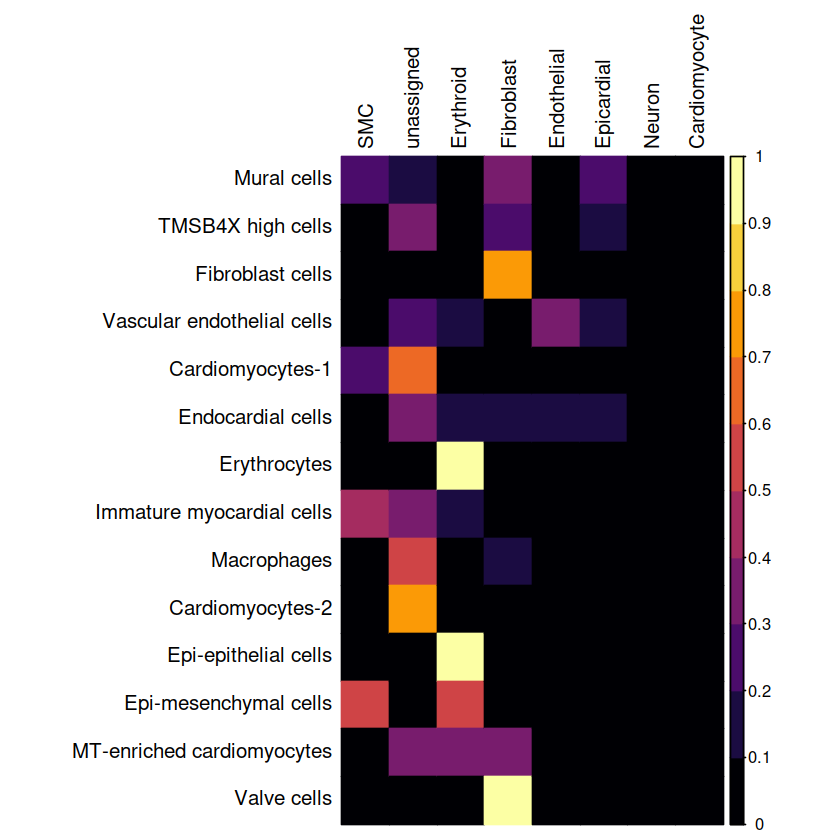

In [212]:
library(corrplot)
library(viridis)
my_palette = viridis::inferno(10)

# png(paste0('chick_D14_markerset_fraction.png'), width = 5, height = 5, res = 300, units = 'in')
# pdf('aa-bbs5-sc-5x5.pdf', width = 5, height = 5)
corrplot(outmat2, method = 'color', is.corr = F, col = my_palette, #col.lim = c(0,1),
         tl.col = 'black', na.label = ' ', na.label.col = 'white')
# dev.off()